In [79]:
import pandas as pd
import numpy as np

import EDA
import regression
import outlier


df = pd.read_csv('ship-data.csv')
train_index = int(df.shape[0] * .8)
df_train = df[:train_index]
df_test = df[train_index:]

In [80]:
v = df[df.columns[11]].values
u = df[df.columns[12]].values
x = np.concatenate([v.reshape(-1, 1), u.reshape(-1, 1)], axis=1)
prd = outlier.Rc(x).fit(.002)
df.loc[prd == -1, 'Speed Through Water (knots)'] = df.loc[prd == -1, 'Speed Over Ground (knots)']

Draft

In [81]:
df.loc[df[df.columns[6]]==0, df.columns[6]] = df.loc[df[df.columns[6]]==0, df.columns[7]]

In [82]:
df.loc[df[df.columns[19]]<-100, df.columns[19]]

791    -273.15
792    -273.15
793    -273.15
794    -273.15
795    -273.15
796    -273.15
2194   -273.15
2195   -273.15
2196   -273.15
2197   -273.15
2198   -273.15
2199   -273.15
2200   -273.15
2201   -273.15
2202   -273.15
2203   -273.15
2204   -273.15
2205   -273.15
2206   -273.15
2207   -273.15
2208   -273.15
2209   -273.15
2210   -273.15
2211   -273.15
Name: Weather Service Temperature (celsius), dtype: float64

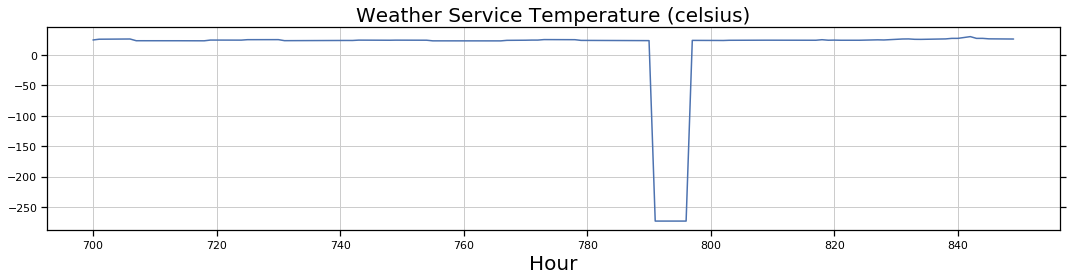

count    150.000000
mean      12.758112
std       58.567585
min     -273.150000
25%       23.789406
50%       24.398334
75%       25.279450
max       30.315769
Name: Weather Service Temperature (celsius), dtype: float64


In [20]:
vs = EDA.Visual(df[700:850])
vs.plot(df.columns[19])

In [83]:
df.loc[791:796, df.columns[19]] = df.loc[781:790, df.columns[19]].mean()

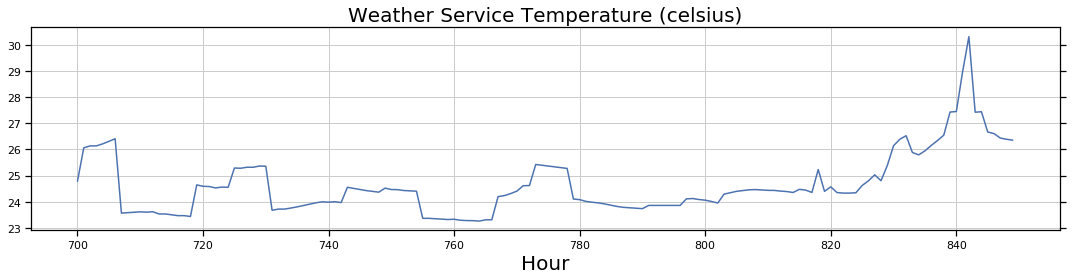

count    150.000000
mean      24.638463
std        1.162583
min       23.260032
25%       23.858767
50%       24.398334
75%       25.279450
max       30.315769
Name: Weather Service Temperature (celsius), dtype: float64


In [27]:
vs.plot(df.columns[19])

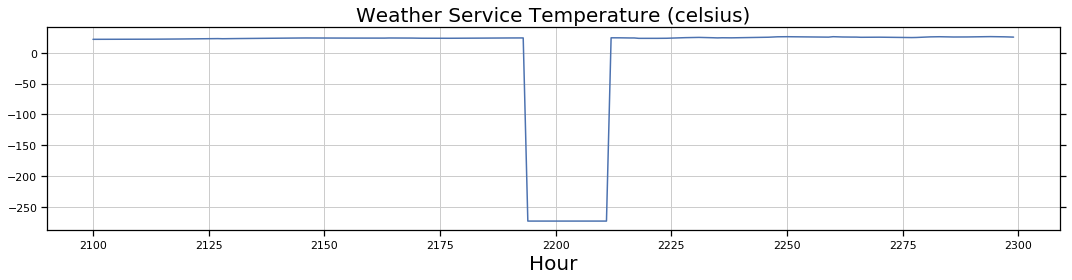

count    200.000000
mean      -2.427123
std       85.359496
min     -273.150000
25%       23.322032
50%       24.143272
75%       25.168050
max       26.440300
Name: Weather Service Temperature (celsius), dtype: float64


In [84]:
vs = EDA.Visual(df[2100:2300])
vs.plot(df.columns[19])

In [85]:
df.loc[2194:2211, df.columns[19]] = df.loc[2192:2193, df.columns[19]].mean()

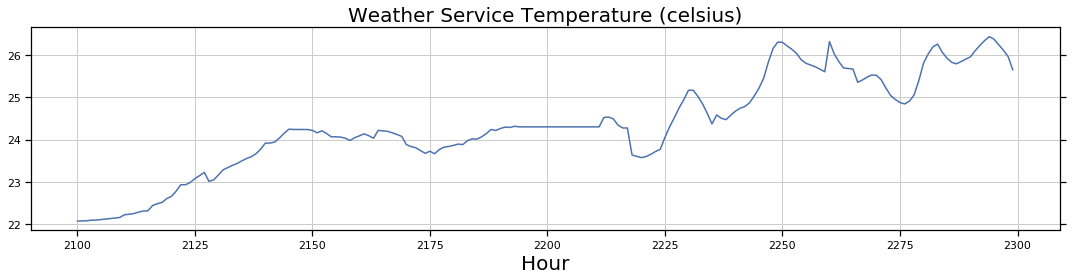

count    200.000000
mean      24.343459
std        1.127286
min       22.067317
25%       23.768716
50%       24.274310
75%       25.168050
max       26.440300
Name: Weather Service Temperature (celsius), dtype: float64


In [86]:
vs.plot(df.columns[19])

In [87]:
power = ['Time', 'Shaft Speed (RPM)', 'Shaft Torque (kNm)',
       'Shaft Power (kW)']
df_all = df.drop(power, 1)

df_train = df_all[:train_index]
df_test = df_all[train_index:]

xtr = df_train.drop('Main Engine Fuel Consumption (MT/day)', 1).values
ytr = df_train['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

xte = df_test.drop('Main Engine Fuel Consumption (MT/day)', 1).values
yte = df_test['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

In [36]:
df_all.head()

,Main Engine Fuel Consumption (MT/day),Main Engine Using HFO (bool),Main Engine Using MGO (bool),Draft Forward (meters),Draft Aft (meters),Draft Mid-1 (meters),Draft Mid-2 (meters),Speed Over Ground (knots),Speed Through Water (knots),Heading (degrees),Rudder Angle (degrees),Weather Service Apparent Wind Speed (knots),Weather Service Apparent Wind Direction (degrees from bow),Weather Service True Wind Speed (knots),Weather Service True Wind Direction (degrees from north),Weather Service Temperature (celsius),Weather Service Sea Current Direction (degrees from north),Weather Service Sea Current Speed (knots),Water Depth (meters)
0,39.459546,0.0,0.0,0.0,0.0,11.497695,11.497695,15.463448,15.607449,167.741687,358.025169,10.562150,20.425315,6.675341,314.224434,20.283071,254.033533,0.070896,0.0
1,39.068840,0.0,0.0,0.0,0.0,11.509352,11.509352,15.744354,15.776289,168.034239,357.967447,11.235851,23.426522,7.034934,308.615477,20.360865,323.890575,0.006596,0.0
2,39.033464,0.0,0.0,0.0,0.0,11.531678,11.531678,15.939796,15.707046,152.496507,358.605730,9.877019,22.396432,7.778714,303.563221,20.534437,22.703059,0.027087,0.0
3,39.319707,0.0,0.0,0.0,0.0,11.545624,11.545624,16.135230,15.723442,128.601049,358.864694,7.794503,8.588757,8.508143,300.737464,20.641539,347.948256,0.034555,0.0
4,39.409119,0.0,0.0,0.0,0.0,11.549795,11.549795,16.176168,15.692471,107.945165,358.951153,8.224946,-15.548513,8.541664,302.903406,20.662176,217.495117,0.029501,0.0


In [88]:
df1 = df_all.drop('Speed Over Ground (knots)', 1)

In [89]:
df1['Trim'] = df1['Draft Forward (meters)'] - df1['Draft Aft (meters)']

In [43]:
df1.columns

Index(['Main Engine Fuel Consumption (MT/day)', 'Main Engine Using HFO (bool)',
       'Main Engine Using MGO (bool)', 'Draft Forward (meters)',
       'Draft Aft (meters)', 'Draft Mid-1 (meters)', 'Draft Mid-2 (meters)',
       'Speed Through Water (knots)', 'Heading (degrees)',
       'Rudder Angle (degrees)', 'Weather Service Apparent Wind Speed (knots)',
       'Weather Service Apparent Wind Direction (degrees from bow)',
       'Weather Service True Wind Speed (knots)',
       'Weather Service True Wind Direction (degrees from north)',
       'Weather Service Temperature (celsius)',
       'Weather Service Sea Current Direction (degrees from north)',
       'Weather Service Sea Current Speed (knots)', 'Water Depth (meters)',
       'Trim'],
      dtype='object')

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components=1)
pca.fit_transform(df.iloc[:, 4:8])

array([[6.18426723],
       [6.17317786],
       [6.15193762],
       ...,
       [4.01218079],
       [4.00920918],
       [4.01045864]])

In [92]:
df1['Draft'] = pca.fit_transform(df.iloc[:, 4:8])

In [93]:
draft = ['Draft Forward (meters)',
       'Draft Aft (meters)', 'Draft Mid-1 (meters)', 'Draft Mid-2 (meters)', 'Trim', 'Draft']
df_draft = df1[draft]

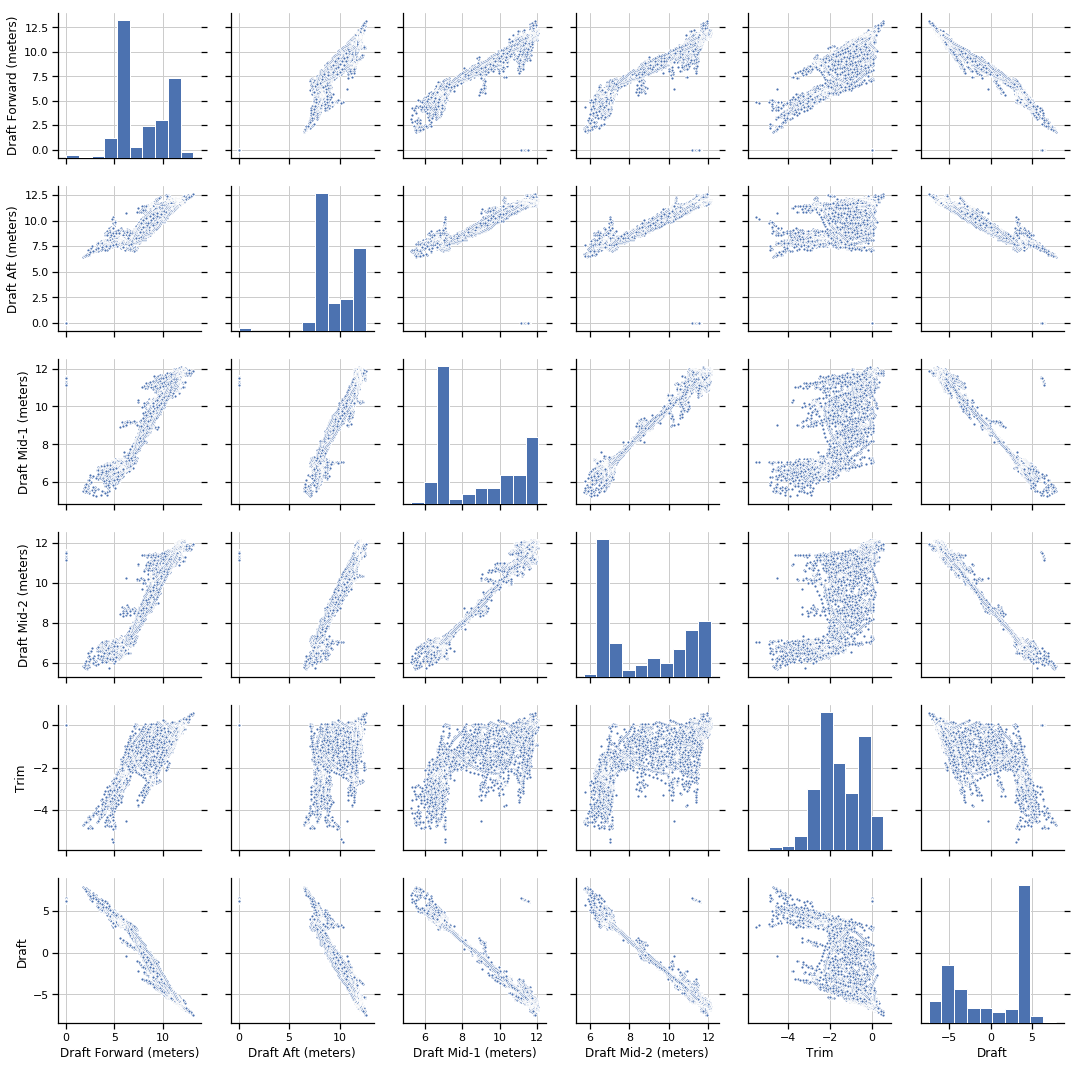

In [59]:
EDA.Visual(df_draft).corr_scatter()

In [94]:
draft = ['Draft Forward (meters)',
       'Draft Aft (meters)', 'Draft Mid-1 (meters)', 'Draft Mid-2 (meters)']
df2 = df1.drop(draft, 1)

In [95]:
df_train = df1[:train_index]
df_test = df1[train_index:]

xtr = df_train.drop('Main Engine Fuel Consumption (MT/day)', 1).values
ytr = df_train['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

xte = df_test.drop('Main Engine Fuel Consumption (MT/day)', 1).values
yte = df_test['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

model = regression.Rf(xtr, ytr)
model.fit()

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tianyi/Documents/data_practice/VesselTimeSeries/regression.py:96: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor()


Train set accuracy:
0.9988782467425814
Test set accuracy:
0.9940590478849073


In [96]:
model.model.fit(xtr, ytr)
regression.Test(model.model, xte, yte).score()

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy:
0.9758584661153749
RMSE:
2.5936965611496765
MAE:
1.685213983693599


In [97]:
df_train = df2[:train_index]
df_test = df2[train_index:]

xtr = df_train.drop('Main Engine Fuel Consumption (MT/day)', 1).values
ytr = df_train['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

xte = df_test.drop('Main Engine Fuel Consumption (MT/day)', 1).values
yte = df_test['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

model = regression.Rf(xtr, ytr)
model.fit()

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tianyi/Documents/data_practice/VesselTimeSeries/regression.py:96: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor()


Train set accuracy:
0.9988365567450685
Test set accuracy:
0.9926209876221909


In [98]:
model.model.fit(xtr, ytr)
regression.Test(model.model, xte, yte).score()

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy:
0.9763542229180853
RMSE:
2.5669270791986536
MAE:
1.6634283309016165


In [99]:
df_train = df1[:train_index]
df_test = df1[train_index:]

xtr = df_train.drop('Main Engine Fuel Consumption (MT/day)', 1).values
ytr = df_train['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

xte = df_test.drop('Main Engine Fuel Consumption (MT/day)', 1).values
yte = df_test['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

model = regression.Rf(xtr, ytr)
model.fit()

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tianyi/Documents/data_practice/VesselTimeSeries/regression.py:96: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor()


Train set accuracy:
0.9988710477521242
Test set accuracy:
0.9932507376558164


In [67]:
model.model.fit(xtr, ytr)
regression.Test(model.model, xte, yte).score()

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy:
0.9808940827388155
RMSE:
2.3073882797728476
MAE:
1.5445708597098293


In [102]:
model.model.fit(xtr, ytr)
regression.Test(model.model, xte, yte).score()

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy:
0.976122016169872
RMSE:
2.5795001820952446
MAE:
1.6703694363249557


In [106]:
wind = ['Weather Service True Wind Speed (knots)', 'Weather Service True Wind Direction (degrees from north)']
df3 = df1.drop(wind, 1)

In [107]:
df_train = df3[:train_index]
df_test = df3[train_index:]

xtr = df_train.drop('Main Engine Fuel Consumption (MT/day)', 1).values
ytr = df_train['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

xte = df_test.drop('Main Engine Fuel Consumption (MT/day)', 1).values
yte = df_test['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

model = regression.Rf(xtr, ytr)
model.fit()

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tianyi/Documents/data_practice/VesselTimeSeries/regression.py:96: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor()


Train set accuracy:
0.9987840785837767
Test set accuracy:
0.9936667071862981


In [108]:
model.model.fit(xtr, ytr)
regression.Test(model.model, xte, yte).score()

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy:
0.981425750877364
RMSE:
2.2750574555688545
MAE:
1.5330239344625196


In [109]:
df3.head()

,Main Engine Fuel Consumption (MT/day),Main Engine Using HFO (bool),Main Engine Using MGO (bool),Draft Forward (meters),Draft Aft (meters),Draft Mid-1 (meters),Draft Mid-2 (meters),Speed Through Water (knots),Heading (degrees),Rudder Angle (degrees),Weather Service Apparent Wind Speed (knots),Weather Service Apparent Wind Direction (degrees from bow),Weather Service Temperature (celsius),Weather Service Sea Current Direction (degrees from north),Weather Service Sea Current Speed (knots),Water Depth (meters),Trim,Draft
0,39.459546,0.0,0.0,0.0,0.0,11.497695,11.497695,15.607449,167.741687,358.025169,10.562150,20.425315,20.283071,254.033533,0.070896,0.0,0.0,6.184267
1,39.068840,0.0,0.0,0.0,0.0,11.509352,11.509352,15.776289,168.034239,357.967447,11.235851,23.426522,20.360865,323.890575,0.006596,0.0,0.0,6.173178
2,39.033464,0.0,0.0,0.0,0.0,11.531678,11.531678,15.707046,152.496507,358.605730,9.877019,22.396432,20.534437,22.703059,0.027087,0.0,0.0,6.151938
3,39.319707,0.0,0.0,0.0,0.0,11.545624,11.545624,15.723442,128.601049,358.864694,7.794503,8.588757,20.641539,347.948256,0.034555,0.0,0.0,6.138670
4,39.409119,0.0,0.0,0.0,0.0,11.549795,11.549795,15.692471,107.945165,358.951153,8.224946,-15.548513,20.662176,217.495117,0.029501,0.0,0.0,6.134702


In [112]:
df3['Apparent Current Direction'] = df3['Heading (degrees)'] - df3['Weather Service Sea Current Direction (degrees from north)']

In [117]:
df3['Apparent Current Speed'] = df3['Weather Service Sea Current Speed (knots)'] * np.cos(df3['Apparent Current Direction'])

In [120]:
current = ['Weather Service Sea Current Speed (knots)', 'Weather Service Sea Current Direction (degrees from north)']
df4 = df3.drop(current, 1)

In [121]:
df_train = df4[:train_index]
df_test = df4[train_index:]

xtr = df_train.drop('Main Engine Fuel Consumption (MT/day)', 1).values
ytr = df_train['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

xte = df_test.drop('Main Engine Fuel Consumption (MT/day)', 1).values
yte = df_test['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

model = regression.Rf(xtr, ytr)
model.fit()

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tianyi/Documents/data_practice/VesselTimeSeries/regression.py:96: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor()


Train set accuracy:
0.9988288107060403
Test set accuracy:
0.9933784225232138


In [122]:
model.model.fit(xtr, ytr)
regression.Test(model.model, xte, yte).score()

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy:
0.9802865129708058
RMSE:
2.343788730380743
MAE:
1.5697608053613057
